# <font color=blue> k-nearest neighbors algorithm (k-NN) classification on Iris Dataset #

* **<font color=red>We are importing some important libraries for analysis**

In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

* **<font color=red> I import here Iris Dataset and checking head of data </font>**

In [2]:
data=pd.read_csv('V:\\Study Material\\Data\\Iris\\iris.csv')

* <font color=red>**Extract few rows of data for understanding data pattern** 

In [3]:
data.head()

,Sepal Length(cm),Sepal width(cm),Petal length(cm),Petal width(cm),Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


* <font color=red>**The describe() function is used to view some basic statistical details like percentile, mean, std etc. of a data frame of numeric values.**

In [4]:
data.describe()

,Sepal Length(cm),Sepal width(cm),Petal length(cm),Petal width(cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


* <font color=red>**The info() function is used to print a concise summary of a DataFrame. This method prints information about a DataFrame including the index dtype and column dtypes, non-null values and memory usage.**

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Sepal Length(cm)  150 non-null    float64
 1   Sepal width(cm)   150 non-null    float64
 2   Petal length(cm)  150 non-null    float64
 3   Petal width(cm)   150 non-null    float64
 4   Class             150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


* <font color=red>**The value_counts() method returns a Series containing the counts of unique values.**

In [6]:
data["Class"].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Class, dtype: int64

* **<font color=red> I check here any missing values in dataset </font>**

In [7]:
data.isnull().sum()

Sepal Length(cm)    0
Sepal width(cm)     0
Petal length(cm)    0
Petal width(cm)     0
Class               0
dtype: int64

## **<font color=blue> Data Visualization </font>** 

* **<font color=red>Here i used pair plot to see distribution of every single variables and relationships between two variables </font>**

<Figure size 1080x1080 with 0 Axes>

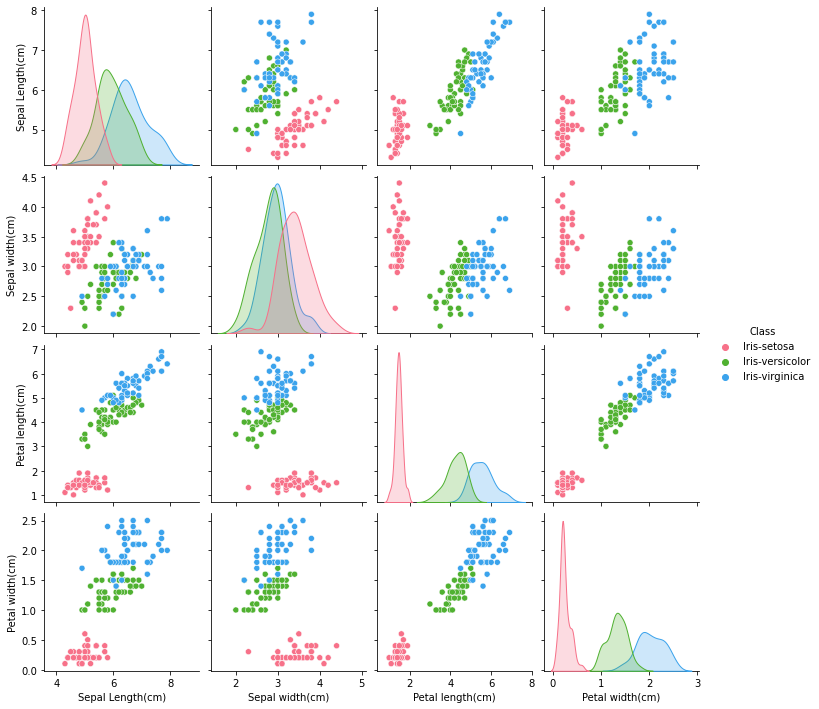

<Figure size 432x288 with 0 Axes>

In [8]:
plt.figure(figsize=(15,15))
sns.pairplot(data=data,hue='Class',palette="husl")
plt.show()
plt.savefig('fig.jpeg')

* **We used corr() for finding correlation. Correlation is a statistical measure. Correlation explains how one or more variables are related to each other. These variables can be input data features which have been used to classify our target variable.**

* **<font color=red>Understanding Correlation between Variables</font>**

In [9]:
data.corr()

,Sepal Length(cm),Sepal width(cm),Petal length(cm),Petal width(cm)
Sepal Length(cm),1.000000,-0.109369,0.871754,0.817954
Sepal width(cm),-0.109369,1.000000,-0.420516,-0.356544
Petal length(cm),0.871754,-0.420516,1.000000,0.962757
Petal width(cm),0.817954,-0.356544,0.962757,1.000000


* **<font color=red>Heatmap for visualizing correlation </font>**

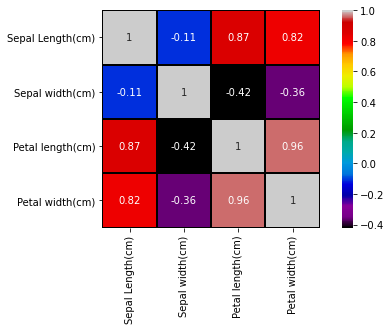

In [10]:
plt.figure(figsize=(8,4))
sns.heatmap(data.corr(), annot=True, cmap='nipy_spectral',linewidths=1,linecolor='black',square=True);

* **<font color=red>I used label encoder for encoding class </font>**

In [11]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [12]:
data["Class"]=le.fit_transform(data["Class"])
data.head()

,Sepal Length(cm),Sepal width(cm),Petal length(cm),Petal width(cm),Class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


* **The scikit-learn library provides an implementation of the train-test split evaluation procedure via the train_test_split() function. The function takes a loaded dataset as input and returns the dataset split into two subsets (Train & Test).**

### **<font color=blue>Splitting Data into Training and Testing purpose </font>** 

In [13]:
from sklearn.model_selection import train_test_split
x=data.drop(columns=['Class'])
y=data['Class']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30)

In [14]:
print(x_train.shape)
print(x_test.shape)

(105, 4)
(45, 4)


### **<font color=blue>Building the model </font>** 

*  <b><font color=red>The k-nearest neighbors algorithm (k-NN) is a non-parametric classification method. It returns the mean accuracy on the given test data and labels. In multi-label classification, this is the subset accuracy which is a harsh metric since you require for each sample that each label set be correctly predicted.

In [15]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=1)

* <b><font color=red>Model fitting is a measure of how well a machine learning model generalizes to similar data to that on which it was trained. A model that is well-fitted produces more accurate outcomes

In [16]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

* <b> Accuracy is one metric for evaluating classification models. Informally, accuracy is the fraction of predictions our model got right. Formally, accuracy has the following definition: Accuracy = Number of correct predictions Total number of predictions.

In [17]:
print("Accuracy: ",knn.score(x_test,y_test))

Accuracy:  0.9777777777777777
